# Assignment 3 - ATP Production

[9.44, 4.04, 3.72, 7.54, 5.7, 4.53, 7.38, 6.51, 4.65, 4.72, 3.29, 5.69, 9.44, 7.04, 4.58, 7.85, 6.42, 5.09, 8.67, 3.1, 1.73, 6.13, 1.68, 4.5, 4.91, 8.44, 4.59, 6.97, 2.41, 7.44, 9.24, 0.78, 7.78, 2.8, 1.12, 7.38, 3.77, 4.66, 3.8, 2.76, 5.6, 4.7, 1.9, 7.1, 8.61, 3.55, 6.25, 7.15, 4.29, 1.28, 7.6, 7.42, 6.64, 8.68, 4.04, 1.25, 7.36, 5.05, 5.45, 3.39, 6.84, 0.8, 9.93, 5.67, 6.57, 7.05, 3.03, 6.85, 2.12, 4.89, 3.4, 2.56, 8.17, 7.25, 2.53, 8.45, 6.48, 7.94, 6.2, 6.15, 2.96, 5.39, 6.44, 4.52, 5.95, 7.91, 6.61, 2.11, 5.2, 5.8, 4.36, 2.73, 3.23, 6.74, 8.6, 8.66, 6.8, 5.46, 2.15]


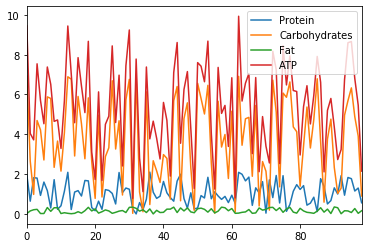

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm

filename_tsv = "/Users/miguel/Desktop/MASTER/AST/data/diet_and_atp.tsv"

tsv_read = pd.read_csv(filename_tsv, sep='\t')

tsv_read.plot()
atp = list(tsv_read.ATP)
proteins = list(tsv_read.Protein)
carbo = list(tsv_read.Carbohydrates)
fat = list(tsv_read.Fat)
        

1) Write a python script that construct the model that we were investigating in pyMC3.

In [19]:
basic_model = pm.Model()
with basic_model:
    std = pm.Uniform("std", 0, 100)

    a = pm.Uniform('Proteins',0,1)
    b = pm.Uniform('Carbohydrates',0,1)
    c = pm.Uniform('Fat',0,1)
    #sigma = pm.HalfNormal('sigma', sigma=1)

    #mu = proteins*a + carbo*b + fat*c
    
   # Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
   # map_estimate = pm.find_MAP(model=basic_model)
    
    mean = pm.Deterministic("mean", a*proteins + b*carbo + c*fat)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=atp)



2) Fulfill the observations within the model and run the Metropolis algorithm to infer posterior probabilities.

In [20]:

with basic_model:
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[2000:]


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [Fat]
>Metropolis: [Carbohydrates]
>Metropolis: [Proteins]
>Metropolis: [std]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [01:49<00:00, 3673.28draws/s]
The number of effective samples is smaller than 25% for some parameters.



3) Plot the traces and the posterior, and explain the results obtained with your own words, but being as much formal as you can.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib

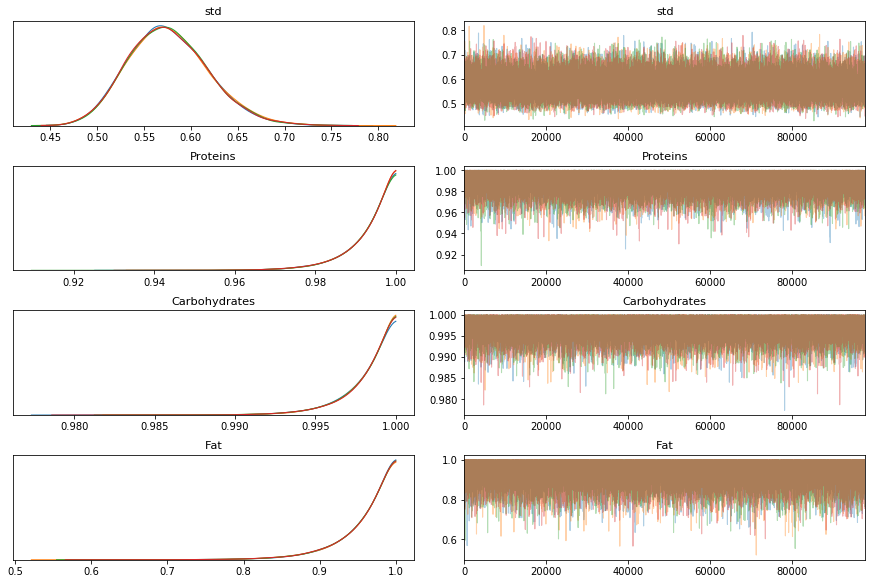

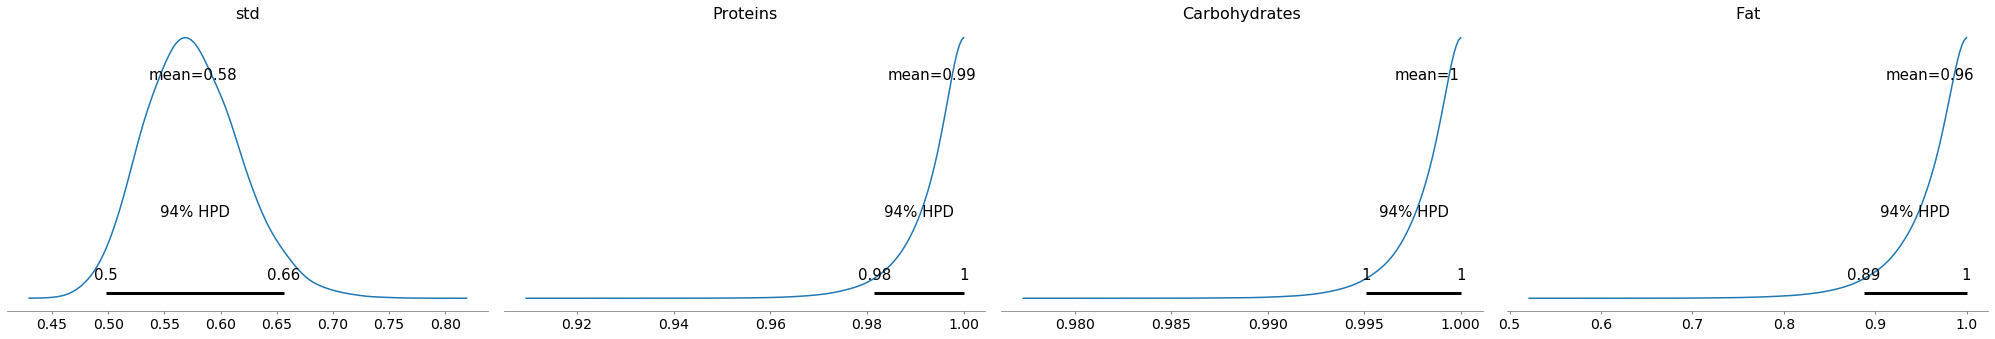

In [24]:
with basic_model:
    pm.plots.traceplot(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])
    pm.plot_posterior(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])



The first plots (the traces) shows us the results during the execution of the algorithm. As it can be seen, the results tend to 1 as those are the correct values that adjust better our model (as we know from the last assignment). 

The posterior plots shows us the mean and SD of our model. As we can see, all means tend to 1 and have a little SD, except for the "Fat" variable. This may be because the correct value for "Fat", as we saw in the last assignment is near 1.9, so maybe the we should make the Uniform distribution interval bigger to obtain a better model. 

In [25]:
basic_model_2 = pm.Model()
with basic_model_2:
    std = pm.Uniform("std", 0, 100)

    a = pm.Uniform('Proteins',0,2)
    b = pm.Uniform('Carbohydrates',0,2)
    c = pm.Uniform('Fat',0,2)
    #sigma = pm.HalfNormal('sigma', sigma=1)

    #mu = proteins*a + carbo*b + fat*c
    
   # Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
   # map_estimate = pm.find_MAP(model=basic_model)
    
    mean = pm.Deterministic("mean", a*proteins + b*carbo + c*fat)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=atp)

In [26]:
with basic_model_2:
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[2000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [Fat]
>Metropolis: [Carbohydrates]
>Metropolis: [Proteins]
>Metropolis: [std]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [01:51<00:00, 3596.65draws/s]
The number of effective samples is smaller than 10% for some parameters.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib

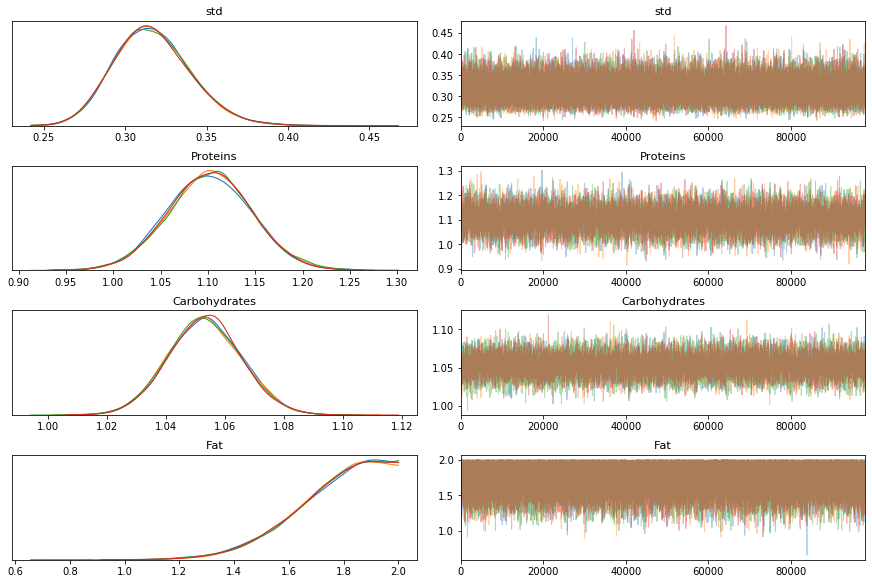

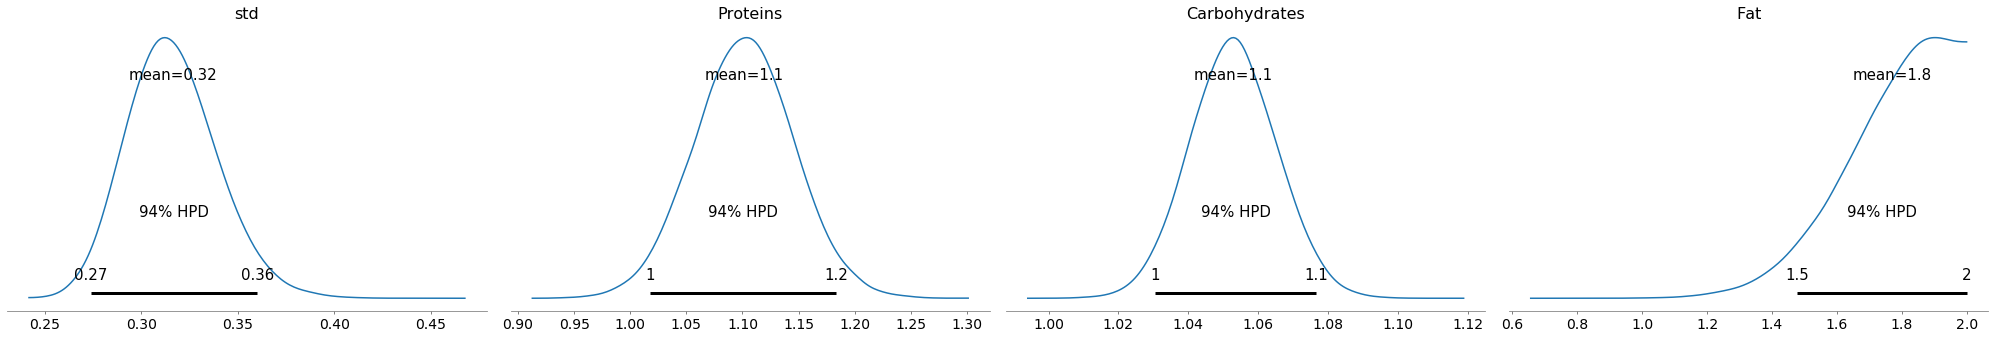

In [27]:
with basic_model_2:
    pm.plots.traceplot(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])
    pm.plot_posterior(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])



As we can see here, increasing the interval for the unifomrm distribution gives us a much more reliable model. Here we can see that the new distributions adjust better to the values obtained in the last assignment. Although, we still obtain a much bigger CI in the Fat variable. Also, in Proteins and Carbos the distributions seem "Normal", but that is not the case for the Fat variable, we can see that the distribution do not decrease equally after the maximum at nearly 1.9. I will increase the interval of the uniform distribution of the Fat variable:

In [28]:
basic_model_3 = pm.Model()
with basic_model_3:
    std = pm.Uniform("std", 0, 100)

    a = pm.Uniform('Proteins',0,2)
    b = pm.Uniform('Carbohydrates',0,2)
    c = pm.Uniform('Fat',0,5)
    #sigma = pm.HalfNormal('sigma', sigma=1)

    #mu = proteins*a + carbo*b + fat*c
    
   # Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
   # map_estimate = pm.find_MAP(model=basic_model)
    
    mean = pm.Deterministic("mean", a*proteins + b*carbo + c*fat)
    
    obs = pm.Normal("obs", mu=mean, sd=std, observed=atp)

In [29]:
with basic_model_3:
    trace = pm.sample(100000, step=pm.Metropolis())
    burned_trace = trace[2000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [Fat]
>Metropolis: [Carbohydrates]
>Metropolis: [Proteins]
>Metropolis: [std]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [01:51<00:00, 3594.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/backends/matplotlib

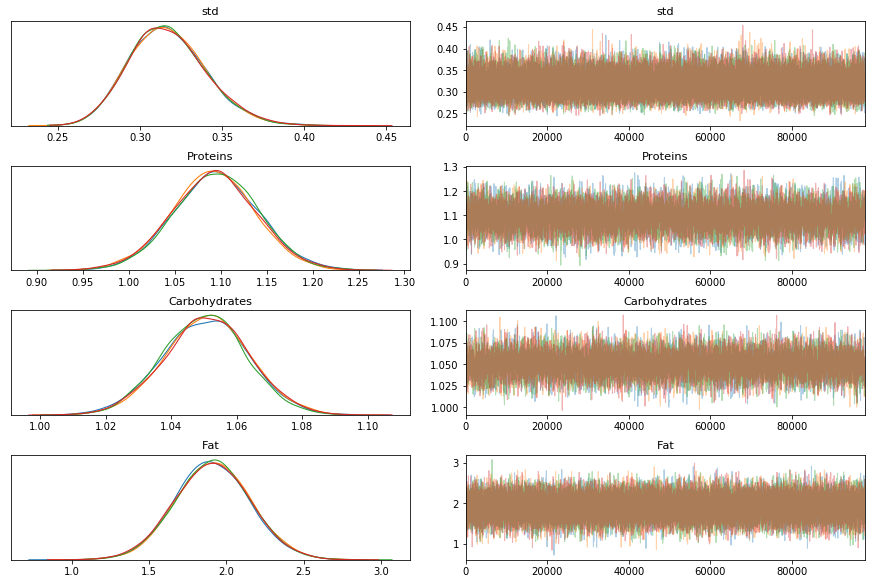

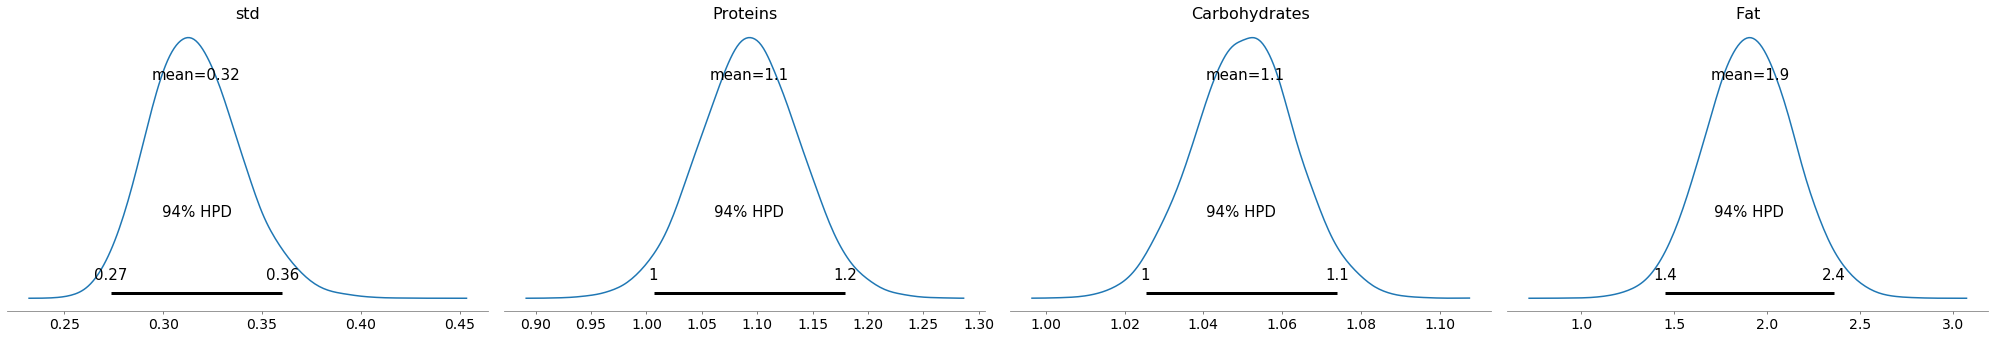

In [30]:
with basic_model_3:
    pm.plots.traceplot(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])
    pm.plot_posterior(burned_trace, ["std", "Proteins", "Carbohydrates", "Fat"])

Here we can see that the Fat variable have a much bigger SD, the mean is around 1.9 but the 95% CI is (1.4,2.4)